In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x=np.array([1.,2.,3.,4.,5.])
y=np.array([1.,3.,2.,3.,5.])

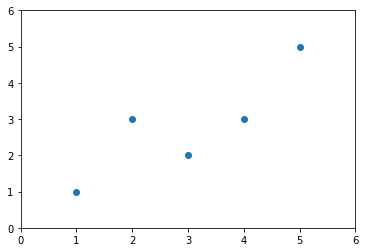

In [3]:
plt.scatter(x,y)
plt.axis([0,6,0,6])
plt.show()

In [4]:
x_mean = np.mean(x)
y_mean = np.mean(y)

In [5]:
num=0.0#分子
d=0.0#分母
for x_i,y_i in zip(x,y):#将x和y放一起每次取出其中一个值用for循环效率稍低
    num+=(x_i-x_mean) *(y_i-y_mean)
    d+=(x_i-x_mean)**2

In [6]:
a=num/d
b=y_mean-a*x_mean

In [7]:
a

0.8

In [8]:
b

0.39999999999999947

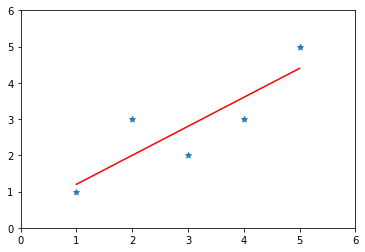

In [9]:
y_hat=a*x+b#计算推测之
plt.scatter(x,y,marker='*')
plt.plot(x,y_hat,color='r')
plt.axis([0,6,0,6])
plt.show()

In [10]:
x_predict = 6
y_predict = a * x_predict+b
y_predict

5.2

## 使用自己封装的SimpleLinearRegression类

In [11]:
from PlayML.SimpleLinearRegression import SimpleLinearRegression1
reg1=SimpleLinearRegression1()
reg1.fit(x,y)

In [12]:
reg1.predict(np.array([x_predict]))

array([5.2])

In [13]:
reg1.a_

0.8

In [14]:
reg1.b_

0.39999999999999947

In [15]:
y_hat=reg1.predict(x)

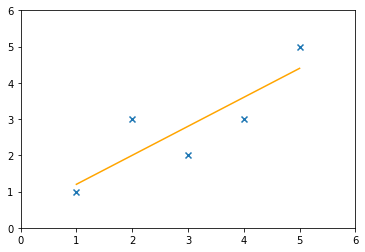

In [16]:
plt.scatter(x,y,marker='x')
plt.plot(x,y_hat,color='orange')
plt.axis([0,6,0,6])
plt.show()

## 向量化实现SimpleLinearRegression

In [17]:
from PlayML.SimpleLinearRegression import SimpleLinearRegression2
reg2=SimpleLinearRegression2()
reg2.fit(x,y)

In [18]:
reg2.a_

0.8

In [19]:
reg2.b_

0.39999999999999947

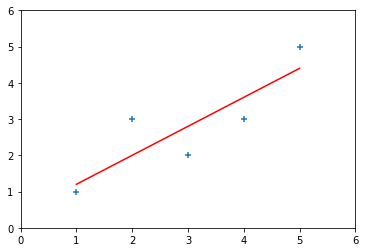

In [20]:
y_hat2=reg2.predict(x)

plt.scatter(x,y,marker='+')
plt.plot(x,y_hat2,color='r')
plt.axis([0,6,0,6])
plt.show()

## 向量化的性能测试

In [21]:
m=1000000
big_x=np.random.random(size=m)
big_y=big_x*2.0+3.0+np.random.normal(0,1,size=m)#增加的random.normal是一个属于0,1正态分布的误差项

In [22]:
%timeit reg1.fit(big_x,big_y)
%timeit reg2.fit(big_x,big_y)

1.98 s ± 246 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
32.6 ms ± 5.03 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### 发现向量化速度相对更快

In [23]:
reg1.a_

2.007333354961064

In [24]:
reg1.b_

2.996620041874851

In [25]:
reg2.a_

2.007333354961019

In [26]:
reg2.b_

2.9966200418748734